Probabilidades de encontrar el electrón en diferentes posiciones:
{0.25: 0.013, 0.71875: 0.018, 0.984375: 0.017, 0.203125: 0.013, 0.3125: 0.011, 0.359375: 0.014, 0.328125: 0.012, 0.515625: 0.016, 0.1875: 0.015, 0.125: 0.024, 0.953125: 0.019, 0.671875: 0.016, 0.578125: 0.013, 0.84375: 0.015, 0.546875: 0.015, 0.34375: 0.01, 0.90625: 0.016, 0.03125: 0.019, 0.828125: 0.013, 0.171875: 0.013, 0.921875: 0.018, 0.375: 0.015, 0.421875: 0.016, 0.484375: 0.014, 0.65625: 0.013, 0.234375: 0.02, 0.6875: 0.015, 0.609375: 0.014, 0.0625: 0.021, 0.140625: 0.013, 0.015625: 0.016, 0.453125: 0.019, 0.40625: 0.021, 0.5625: 0.018, 0.796875: 0.012, 0.078125: 0.016, 0.75: 0.019, 0.859375: 0.019, 0.96875: 0.014, 0.09375: 0.012, 0.265625: 0.015, 0.296875: 0.019, 0.59375: 0.02, 0.5: 0.014, 0.046875: 0.017, 0.9375: 0.009, 0.78125: 0.025, 0.4375: 0.015, 0.625: 0.023, 0.390625: 0.022, 0.28125: 0.014, 0.890625: 0.015, 0.15625: 0.006, 0.640625: 0.018, 0.734375: 0.019, 0.765625: 0.017, 0.21875: 0.022, 0.8125: 0.012, 0.

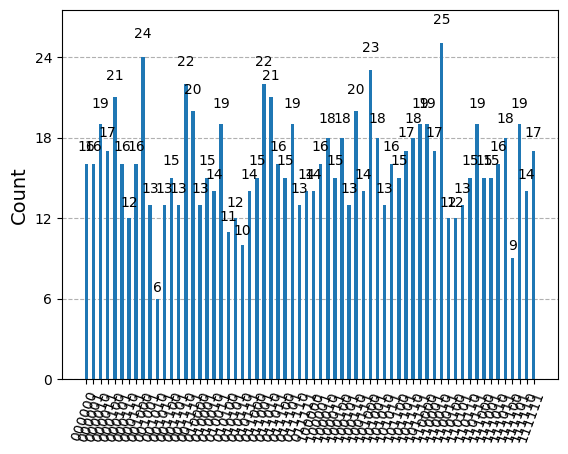

In [5]:

#Paso 1.
import numpy as np
from scipy.linalg import expm  # Importar expm desde scipy.linalg
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt  # Importar matplotlib para mostrar la figura

#Paso 1. Parámetros del problema
L = 1  # Longitud del pozo de potencial
V0 = 1  # Potencial fuera del pozo de potencial
N = 100  # Número de puntos en los que dividimos el espacio
num_qubits = int(np.log2(N))

#Paso 2. Parámetros de la simulación
timesteps = 100  # Número de pasos de tiempo
dt = 0.1  # Incremento de tiempo

#Paso 3. Definir el Hamiltoniano (simplificado)
# Usaremos matrices de Pauli como un ejemplo de Hamiltoniano.
H = np.array([[0, 1], [1, 0]])  # Este es solo un ejemplo, necesitas definir tu Hamiltoniano específico

#Paso 4. Crear circuito cuántico
qc = QuantumCircuit(num_qubits, num_qubits)

#Paso 5. Inicializar el estado del electrón en una superposición
qc.h(range(num_qubits))

#Paso 6. Función para aplicar el operador de evolución temporal
def time_evolution_operator(circuit, hamiltonian, dt):
    # Convertir el Hamiltoniano en un operador unitario para la evolución temporal
    U = Operator(expm(-1j * hamiltonian * dt))
    # Aplicar la evolución temporal
    circuit.unitary(U, range(num_qubits))

#Paso 7. Evolución temporal
for _ in range(timesteps):
    time_evolution_operator(qc, H, dt)

#Paso 8. Medir los qubits
qc.measure(range(num_qubits), range(num_qubits))
n = 1000

#Paso 9. Simular el circuito cuántico
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

#Paso 10. Correr el circuito cuántico simulado sobre el backend
results = simulator.run(compiled_circuit).result()

#Paso 11. Recibir los conteos de las medidas
counts = results.get_counts()

#Paso 12. Calcular las probabilidades de encontrar el electrón en diferentes regiones del espacio
probabilities = {}
for key, value in counts.items():
    position = int(key, 2) * L / (2 ** num_qubits)
    if position in probabilities:
        probabilities[position] += value / n
    else:
        probabilities[position] = value / n

#Paso 13. Mostrar resultados
print("Probabilidades de encontrar el electrón en diferentes posiciones:")
print(probabilities)
plot_histogram(counts)
